<a href="https://colab.research.google.com/github/jean-ntb/Pret_Immobilier_Data/blob/main/Credit_Maison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [ ]:
Df_Credit = pd.read_csv('/content/train.csv')
# Avoir la base de données originale et celle qui va être nettoyer
Df = Df_Credit.copy()

In [ ]:
# Verification des types pour pouvoir manipuler les bons types
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
Df_Credit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
Df.shape

(614, 13)

In [ ]:
# Vérifier si j'ai des valeurs manquantes
# MISE EN PLACE D'UNE POLITIQUE SI BESOIN
Df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Pour les valeurs manquantes :
# - Pour les variables categoriques on remplace par le mode
# - Pour les varaibles numériques je remplace par la valeur médiane de la colonne
Df.columns
Variable_Numerique = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term',]
Variable_Categorique = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

print('Les variables categoriques :', Variable_Categorique)
print('Les variables numériques :', Variable_Numerique)

Les variables categoriques : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numériques : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [ ]:
# Supprimer les valeurs manquantes de Variable_Categorique

Df['Gender'].fillna(Df['Gender'].mode()[0], inplace=True)
Df['Married'].fillna(Df['Married'].mode()[0], inplace=True)
Df['Dependents'].fillna(Df['Dependents'].mode()[0], inplace=True)
Df['Self_Employed'].fillna(Df['Self_Employed'].mode()[0], inplace=True)
Df['Credit_History'].fillna(Df['Credit_History'].mode()[0], inplace=True)



<ipython-input-13-0b5c8793985a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['Gender'].fillna(Df['Gender'].mode()[0], inplace=True)
<ipython-input-13-0b5c8793985a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Supprimer les valeurs manquantes de Variable_Numerique
Df['LoanAmount'].fillna(Df['LoanAmount'].median(), inplace=True)
Df['Loan_Amount_Term'].fillna(Df['Loan_Amount_Term'].median(), inplace=True)



<ipython-input-14-74194c809988>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['LoanAmount'].fillna(Df['LoanAmount'].median(), inplace=True)
<ipython-input-14-74194c809988>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
Df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# Variable Target

Df['Loan_Status'].value_counts()


,count
Loan_Status,
Y,422
N,192


In [ ]:
# Visualiser en pourcentage
Df['Loan_Status'].value_counts(normalize=True)*100


,proportion
Loan_Status,
Y,68.729642
N,31.270358


<Axes: xlabel='Loan_Status'>

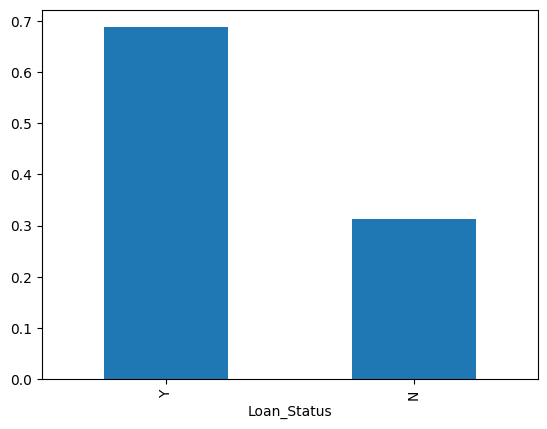

In [ ]:
Df['Loan_Status'].value_counts(normalize=True).plot.bar("Crédit accordé ou non")


<Axes: title={'center': 'Compraison des genres'}, xlabel='Gender'>

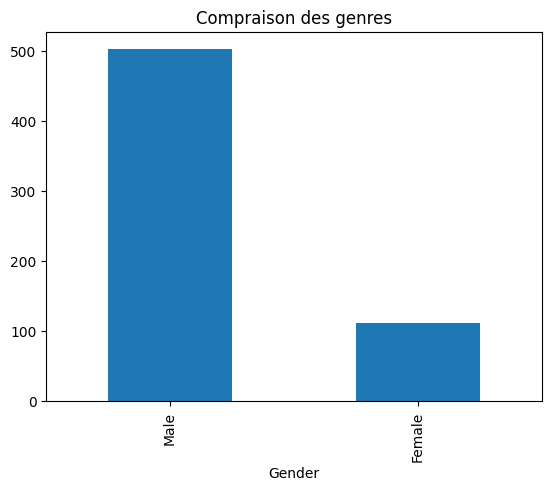

In [ ]:
# Varaible catégorique

Df['Gender'].value_counts().plot.bar(title = "Compraison des genres")


In [ ]:
Df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,81.758958
Female,18.241042


<Axes: title={'center': 'Compraison des statut marié'}, xlabel='Married'>

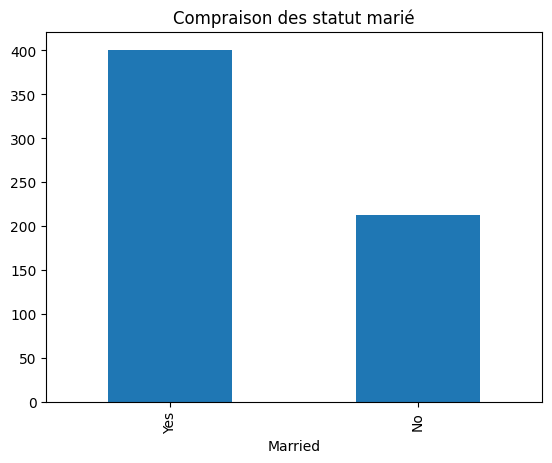

In [ ]:
Df['Married'].value_counts().plot.bar(title = "Compraison des statut marié")

In [ ]:
Df['Married'].value_counts(normalize=True)*100

,proportion
Married,
Yes,65.309446
No,34.690554


<Axes: title={'center': 'Compraison des dépendants'}, xlabel='Dependents'>

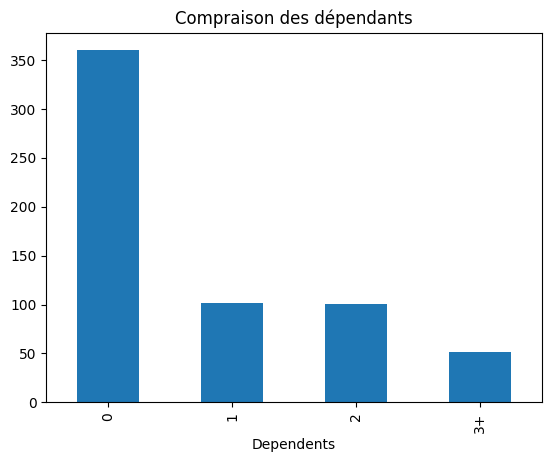

In [ ]:
Df['Dependents'].value_counts().plot.bar(title = "Compraison des dépendants")

In [ ]:
Df['Dependents'].value_counts(normalize=True)*100

,proportion
Dependents,
0,58.631922
1,16.612378
2,16.449511
3+,8.306189


In [ ]:
# Variables numériques

Df[Variable_Numerique].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<ipython-input-26-d355bff36c34>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['ApplicantIncome'])


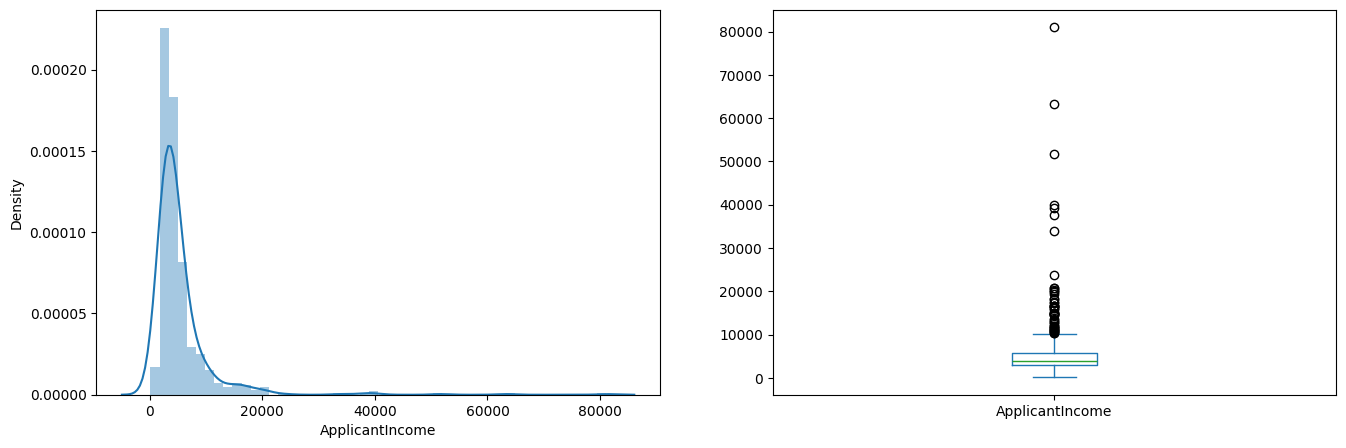

In [ ]:
# apllicant income
plt.figure(1)

plt.subplot(121)
sns.distplot(Df['ApplicantIncome'])

plt.subplot(122)
Df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()

<ipython-input-27-9203eeae4989>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['CoapplicantIncome'])


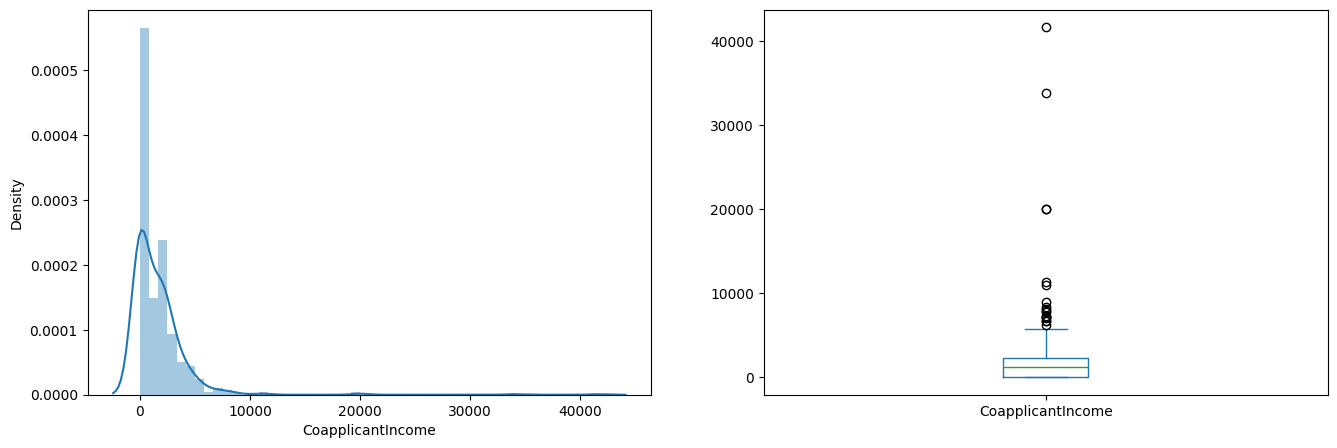

In [ ]:
# apllicant income
plt.figure(1)

plt.subplot(121)
sns.distplot(Df['CoapplicantIncome'])

plt.subplot(122)
Df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()

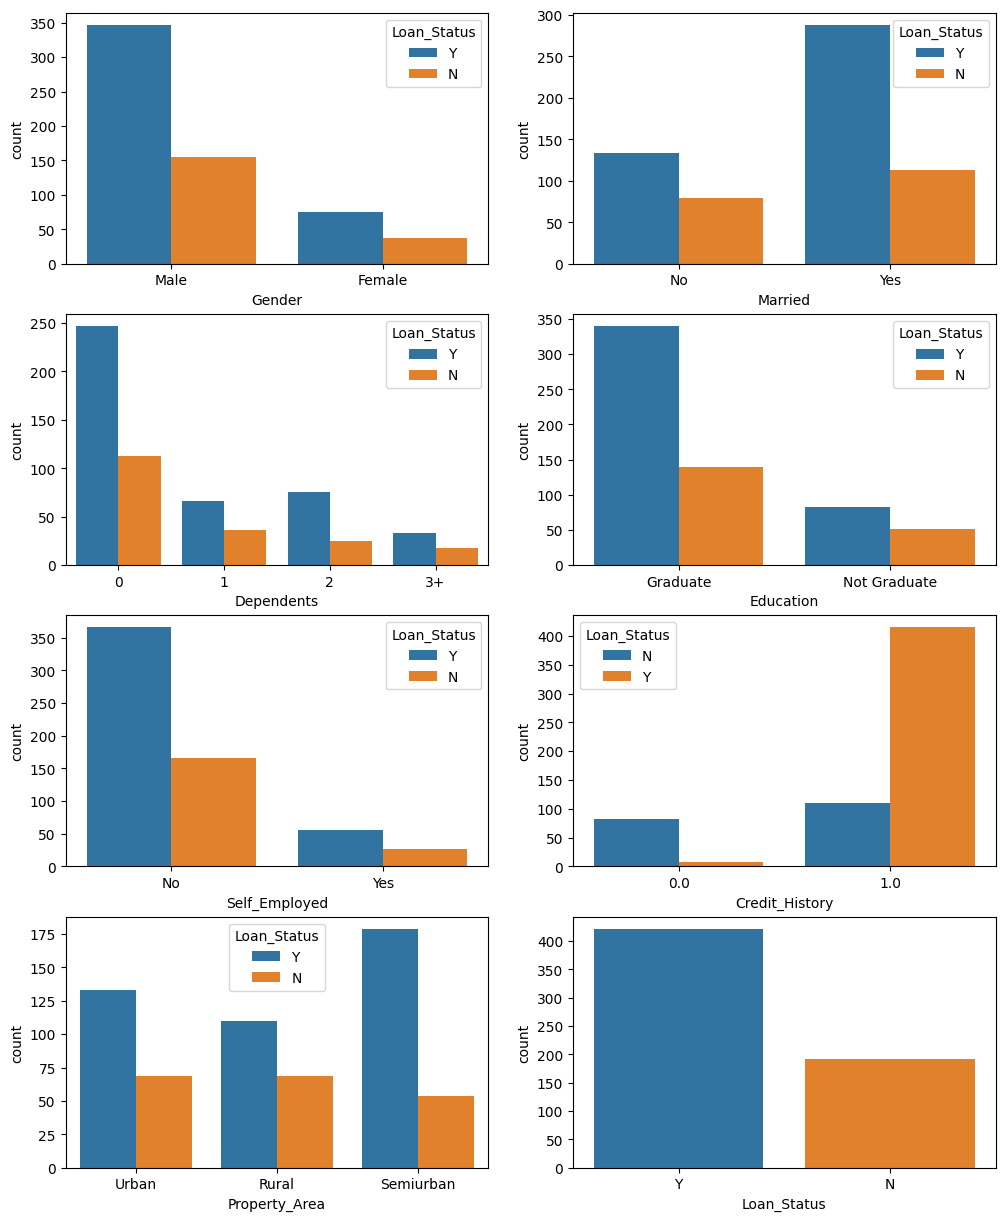

In [ ]:
# Analyse dite Bivrariée
# Les varaibles catégoriques
# Voir variable par variable la relation avec la target qui est le statut du crédit
fig, axes = plt.subplots(4, 2, figsize=(12,15))
for idx, cat_col in enumerate(Variable_Categorique):
    row,col = idx//2, idx%2
    sns.countplot(x=cat_col, data=Df,hue='Loan_Status', ax=axes[row,col])


<Axes: >

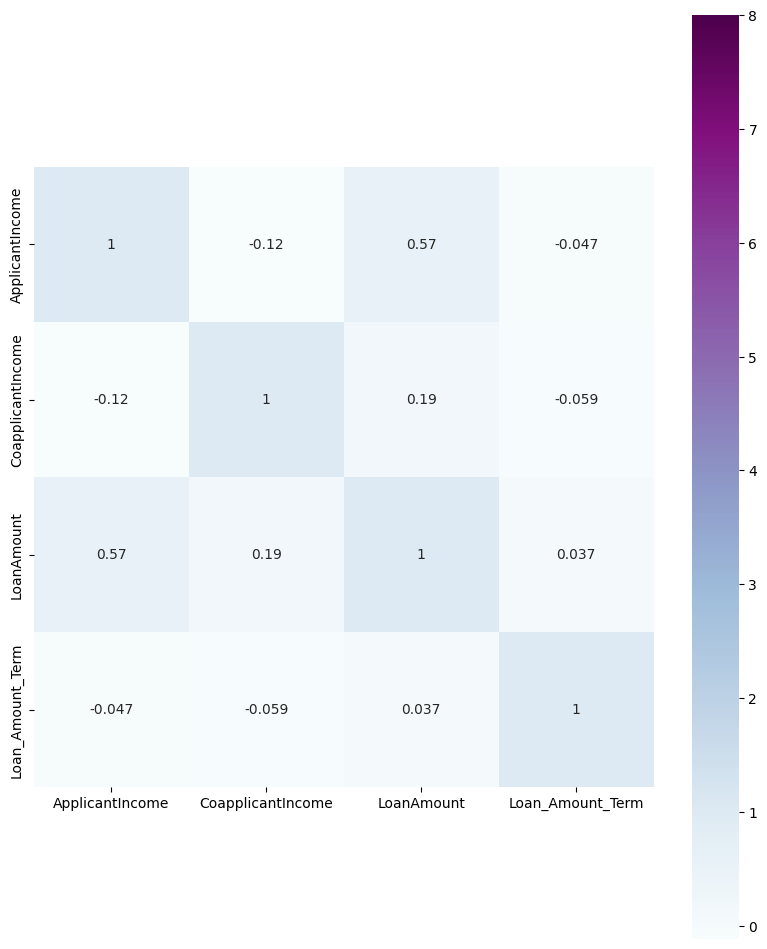

In [ ]:
# Même chose pour les variables numériques

Matrix = Df[Variable_Numerique].corr()
f,ax = plt.subplots(figsize=(10,12))
sns.heatmap(Matrix,vmax=8,square=True,annot=True, cmap='BuPu')

In [ ]:
# Creation du modele

Df_Categorique = Df[Variable_Categorique]
Df_Categorique.head()

<ipython-input-33-96e02963b159>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Df_Categorique = Df_Categorique.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
Df_Categorique = Df_Categorique.applymap(lambda x: 1 if x is True else (0 if x is False else x))

Df_Categorique = pd.get_dummies(Df_Categorique,drop_first=True)
Df_Categorique.head()


<ipython-input-35-973113954188>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Df_Categorique = Df_Categorique.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1


In [ ]:
Df_Encoded = pd.concat([Df[Variable_Numerique],Df_Categorique],axis=1)
Df_Encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [ ]:
# Je définis la target
Y = Df_Encoded['Loan_Status_Y']
Y


,Loan_Status_Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:

X = Df_Encoded.drop(['Loan_Status_Y'],axis=1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
# Je sépare la partie test de la parite entraînement

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=6)

In [ ]:
# Instanciation de mon modele

clf = LogisticRegression()
# Entrainer le modele
clf.fit(x_train,y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Tester le  modèle
Prediction = clf.predict(x_test)
Prediction

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

,Loan_Status_Y
387,0
266,1
292,1
392,1
332,1
...,...
309,1
511,1
98,1
238,1


In [ ]:
accuracy_score(y_test,Prediction)

0.8373983739837398

In [ ]:
# Faire une prévision
Profil_Test = [[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(Profil_Test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# Stocker le model

pickle.dump(clf,open('Credit_Maison.pkl','wb'))